In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import tensorflow as tf

# Step 1: Load and Prepare Data
# Assume you have a CSV file named 'data.csv' with columns 'pixels' and 'label'.
dataset = pd.read_csv('data.csv')
dataset['pixels']=dataset['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))
y = np.array(data['gender'])
data.head()




,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [25]:
dataset.shape

(23705, 5)

In [18]:
dataset.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [22]:
print(sum(dataset.gender==0))##fairly balanced
print(sum(dataset.gender==1))

12391
11314


In [26]:
dataset['pixels']=dataset['pixels'].apply(lambda x: x.reshape(48,48,1))

In [27]:
dataset.shape

(23705, 5)

In [28]:
dataset['pixels']=dataset['pixels'].apply(lambda x: x/255 )##scale the pixels

In [29]:
dataset.age.unique()

array([  1,  10, 100, 101, 103, 105,  11, 110, 111, 115, 116,  12,  13,
        14,  15,  16,  17,  18,  19,   2,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,   3,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,   4,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         5,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,   6,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,   7,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,   8,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,   9,  90,  91,  92,  93,  95,  96,  99],
      dtype=int64)

In [30]:
dataset

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[[[0.5058824], [0.5019608], [0.5019608], [0.49..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[[[0.6431373], [0.2901961], [0.43529412], [0.6..."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[[[0.2627451], [0.27450982], [0.2784314], [0.2..."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[[[0.75686276], [0.77254903], [0.7764706], [0...."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[[[0.7921569], [0.8039216], [0.81960785], [0.8..."
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,"[[[0.49803922], [0.39215687], [0.36862746], [0..."
23701,99,1,1,20170120134639935.jpg.chip.jpg,"[[[0.09019608], [0.10980392], [0.1254902], [0...."
23702,99,2,1,20170110182418864.jpg.chip.jpg,"[[[0.23137255], [0.19607843], [0.14509805], [0..."
23703,99,2,1,20170117195405372.jpg.chip.jpg,"[[[0.1764706], [0.42352942], [0.47058824], [0...."


gender    0
Name: 7, dtype: object

In [40]:
image = []
gender = []
for i,x in enumerate(dataset.pixels):
    image.append(x)
    gender.append(dataset.loc[i][2:3])
    

In [41]:
image=np.array(image).astype(np.float32)
gender=np.array(gender).astype(np.float32)

In [43]:
x_train,x_test,y_train,y_test = train_test_split(image,gender,test_size=0.2,random_state=42,shuffle=True)

In [47]:
len(x_train)


18964

In [46]:
len(x_test)

4741

In [48]:
x_train.shape

(18964, 48, 48, 1)

In [49]:
y_train.shape

(18964, 1)

In [52]:
##Building the model for gender
gender=tf.keras.models.Sequential()##to start the model


gender.add(tf.keras.layers.Conv2D(filters=32,activation='relu',kernel_size=3,input_shape=[48, 48, 1]))
gender.add(tf.keras.layers.Dropout(0.2))##adding dropout at the visiable layer
gender.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))##pool_size is dimension 2*2, stride 2 like it moves 2 square
gender.add(tf.keras.layers.Conv2D(filters=64,activation='relu',kernel_size=3))
gender.add(tf.keras.layers.Dropout(0.2))##adding dropout at the visiable layer
gender.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))
##flatten the result to make input it to Neuronal network
gender.add(tf.keras.layers.Flatten())
##first fully connected layer
gender.add(tf.keras.layers.Dense(units=500,activation='relu'))
gender.add(tf.keras.layers.Dropout(0.2))
##second fully connected layer
gender.add(tf.keras.layers.Dense(units=500,activation='relu'))
gender.add(tf.keras.layers.Dropout(0.2))

##output layer
gender.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [53]:
gender.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [55]:
gender_model=gender.fit(x_train, y_train,batch_size=32,epochs=10)


Epoch 1/10
593/593 [==============================] - 85s 141ms/step - loss: 0.4201 - accuracy: 0.8014
Epoch 2/10
593/593 [==============================] - 87s 146ms/step - loss: 0.3156 - accuracy: 0.8559
Epoch 3/10
593/593 [==============================] - 95s 160ms/step - loss: 0.2832 - accuracy: 0.8764
Epoch 4/10
593/593 [==============================] - 108s 182ms/step - loss: 0.2626 - accuracy: 0.8858
Epoch 5/10
593/593 [==============================] - 99s 167ms/step - loss: 0.2379 - accuracy: 0.8964
Epoch 6/10
593/593 [==============================] - 107s 180ms/step - loss: 0.2211 - accuracy: 0.9081
Epoch 7/10
593/593 [==============================] - 166s 281ms/step - loss: 0.2038 - accuracy: 0.9134
Epoch 8/10
593/593 [==============================] - 130s 219ms/step - loss: 0.1825 - accuracy: 0.9229
Epoch 9/10
593/593 [==============================] - 109s 184ms/step - loss: 0.1634 - accuracy: 0.9327
Epoch 10/10
593/593 [==============================] - 109s 184ms/st

In [63]:
gender.evaluate(x_test,y_test)

149/149 [==============================] - 3s 21ms/step - loss: 0.2684 - accuracy: 0.8895


[0.26835155487060547, 0.8894748091697693]

In [64]:
y_hat_gender=gender.predict(x_test)
y_predict=(y_hat_gender>0.5)##if y_predict>0.5 it will return 1 else will return 0

149/149 [==============================] - 3s 20ms/step


In [66]:
y_predict

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_predict)
print(cm)
accuracy_score(y_test,y_predict)

[[2185  283]
 [ 241 2032]]


0.8894747943471841

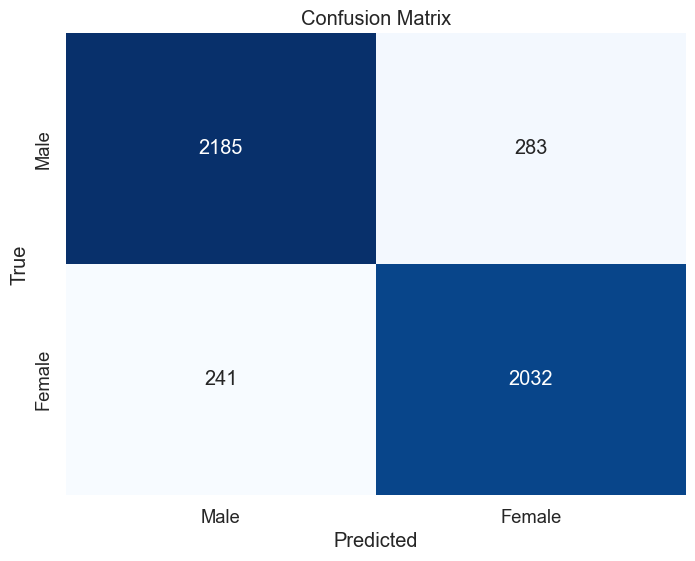

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example confusion matrix
confusion_matrix_data = cm

# Define class labels (in your case, "male" and "female")
class_labels = ["Male", "Female"]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for labels

# Create the heatmap
sns.heatmap(confusion_matrix_data, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [75]:
# Save the model to a file
gender.save("gender_classification_model.h5")


In [80]:
import cv2
import numpy as np
import tensorflow as tf


In [81]:
# Load the saved model
model = tf.keras.models.load_model("gender_classification_model.h5")


In [94]:
# Initialize the camera (0 is typically the built-in camera, or you can specify a camera device)



In [5]:
import cv2
import numpy as np
import tensorflow as tf

# Load the trained gender classification model
model = tf.keras.models.load_model('gender_classification_model.h5')

# Load a pre-trained face detection model (e.g., Haar Cascade Classifier)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize the camera
cap = cv2.VideoCapture(0)  # 0 for the default camera, you can change it if you have multiple cameras

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Set the window name
window_name = "Gender Prediction"
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)  # Allows resizing the window

while True:
    # Capture a frame from the camera
    ret, frame = cap.read()

    # Check if the frame was captured successfully
    if not ret:
        print("Error: Could not read frame.")
        break

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the detected face region
        face_region = frame[y:y + h, x:x + w]

        # Preprocess the face region (resize, convert to grayscale, and normalize)
        face_for_prediction = cv2.cvtColor(face_region, cv2.COLOR_BGR2GRAY)
        face_for_prediction = cv2.resize(face_for_prediction, (48, 48))
        face_for_prediction = face_for_prediction / 255.0  # Normalize to [0, 1]
        face_for_prediction = np.expand_dims(face_for_prediction, axis=-1)  # Add a batch dimension

        # Make a prediction for the detected face
        prediction = model.predict(np.array([face_for_prediction]))

        # Interpret the prediction (0 for male, 1 for female, for example)
        gender = "Male" if prediction < 0.5 else "Female"

        # Draw a bounding box around the detected face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the gender prediction inside the bounding box
        cv2.putText(frame, f"Gender: {gender}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the frame with bounding boxes and predictions
    cv2.imshow(window_name, frame)

    # Exit the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close the OpenCV window
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 31ms/step
